In [1]:
# 20/01/2024

In [2]:
# inbuilt dataset yfinance
# first time install yfinanace
# !pip install yfinance
import yfinance as yf

In [3]:
#Googlcompny
#To load data of Googl company
df=yf.download("GOOGL","2019-1-27","2023-02-11")
# date format yyyy-mm-dd

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-28,54.503502,54.668499,53.730499,53.993000,53.993000,29334000
2019-01-29,54.051998,54.236500,53.300999,53.502998,53.502998,19704000
2019-01-30,53.868000,54.976002,53.832001,54.899502,54.899502,29452000
2019-01-31,55.612000,56.383499,55.262501,56.294498,56.294498,40232000
2019-02-01,56.114498,56.720001,55.712502,55.931000,55.931000,33116000


In [5]:
df.shape

(1019, 6)

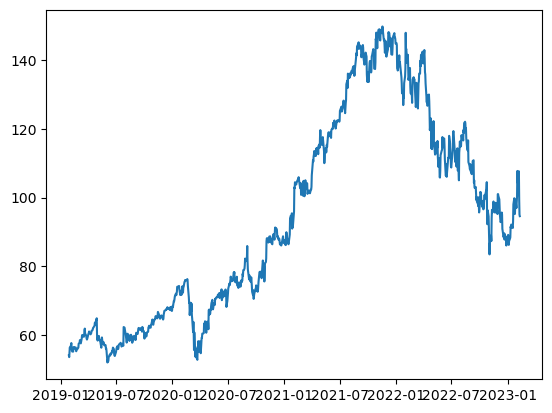

In [6]:
# Visualize the time series ...
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.show()

In [7]:
# Clearly show given time series data is non-stationary ...
# Check given time series data is staionary or non-stationary ...
# Use different - different methods ...
# 1. Use ADFULLER METHOD :- Adfuller inbuilt class which class is stattools class
# Statsmodel inbuilt package ...

from statsmodels.tsa.stattools import adfuller

In [8]:
# Create a function 
def adf_test(X): # adf_test() user defined function ...
    
    result = adfuller(X) # adfuller() inbuilt function which define in
    # adfuller inbuilt and result user variable ...
    print("ADF statistics : %.2f" % result[0])
    print("P-value : %.2f"%result[1])
    if result[1]<=0.05:
        print("Reject all null Hypothesis, Give time series data is stationary")
    else:
        print("Fail to reject the null Hypothesis, Give time series data is not stationary")

In [9]:
# call in main program ...
adf_test(df['Close'])


ADF statistics : -1.46
P-value : 0.55
Fail to reject the null Hypothesis, Give time series data is not stationary


In [10]:
# 2nd Method ...

In [11]:
df.shape

(1019, 6)

In [12]:
df1 = df[['Close']]
df1.shape

(1019, 1)

In [13]:
df1.head()

,Close
Date,
2019-01-28,53.993000
2019-01-29,53.502998
2019-01-30,54.899502
2019-01-31,56.294498
2019-02-01,55.931000


In [14]:
# To store no. of records in given dataframe df1 ...
n = df1.shape[0]
print("No of Records: ",n)


No of Records:  1019


In [15]:
# Divide total record into 2 parts ...

split = n//2
split

509

In [16]:
# First series X1 ...
X1 = df1[0:split] #start = 0 stop = 131-1 = 130 first series ...
X2 = df1[split:] #start = 131 and stop = till end second series ...


In [17]:
X1.shape,X2.shape

((509, 1), (510, 1))

In [18]:
# Find the mean of both series X1 and X2 ...

m1 = X1.mean()
m2 = X2.mean()
print("Mean of First Series : ",m1)
print("Mean of Second Series : ",m2)


Mean of First Series :  Close    68.178868
dtype: float64
Mean of Second Series :  Close    119.376429
dtype: float64


In [19]:
# Similarly find the variance of both series X1 and X2 ...
v1 = X1.var() # var() inbuilt function ...
v2 = X2.var()

print("Variance of First Series : ",v1)
print("Variance of Second Series : ",v2)


Variance of First Series :  Close    113.614145
dtype: float64
Variance of Second Series :  Close    313.820203
dtype: float64


In [20]:
# Cleary we understand given time series is non stationary because of mean and variance of both series 
# Same means not constant

In [21]:
# Given time series data is non stationary ...
# Converts Non-Stationarry data into stationary time series data ...
# Using Different Method ...
# First order differencing means (yt-yt-1) : use inbuilt method shift(1)

differnce = df1['Close'] - df['Close'].shift(1)

In [22]:
differnce

Date
2019-01-28         NaN
2019-01-29   -0.490002
2019-01-30    1.396503
2019-01-31    1.394997
2019-02-01   -0.363499
                ...   
2023-02-06   -1.879997
2023-02-07    4.739998
2023-02-08   -8.269997
2023-02-09   -4.360001
2023-02-10   -0.440002
Name: Close, Length: 1019, dtype: float64

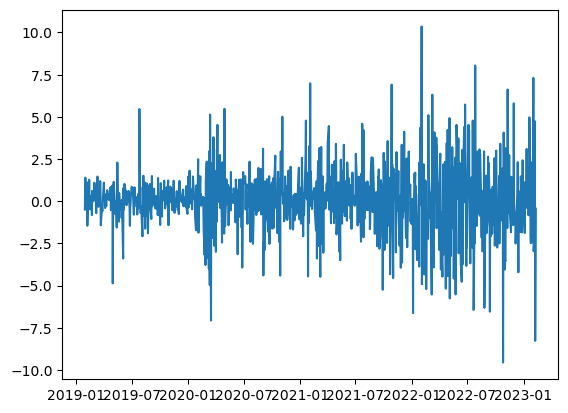

In [23]:
# Visualize difference after remove null rows ...
plt.plot(differnce.dropna()) # dropna mean remove all null value
plt.show()

In [24]:
# Check stationary or not new series ...
# Call main program ...

adf_test(differnce.dropna())

ADF statistics : -34.05
P-value : 0.00
Reject all null Hypothesis, Give time series data is stationary


In [25]:
# ARIMA : I(i) d-1
# AR(P) : PACF
# MA(q) : ACF

In [26]:
# 21/01/2024

In [27]:
# Visualize ACF Curve ...
# Inbuilt class plot_acf ...

from statsmodels.graphics.tsaplots import plot_acf

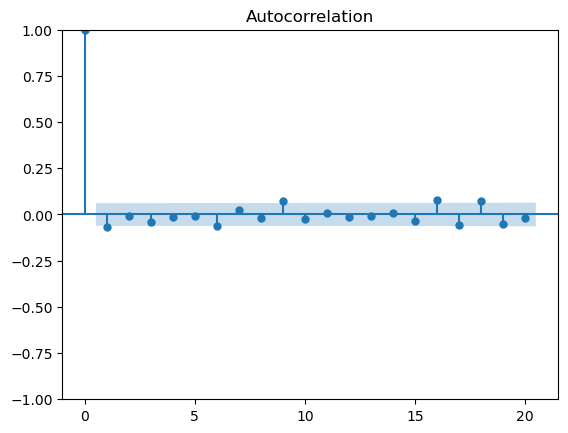

In [28]:
# plot_acf() inbuilt function of class plot_acf ...

plot_acf(differnce.dropna(),lags=20)
plt.show()

In [29]:
# TO see ACF curver order of MA means q=0 ...

In [30]:
# Visualize PACF Curve ...
# Inbuilt class plot_pacf ...

from statsmodels.graphics.tsaplots import plot_pacf

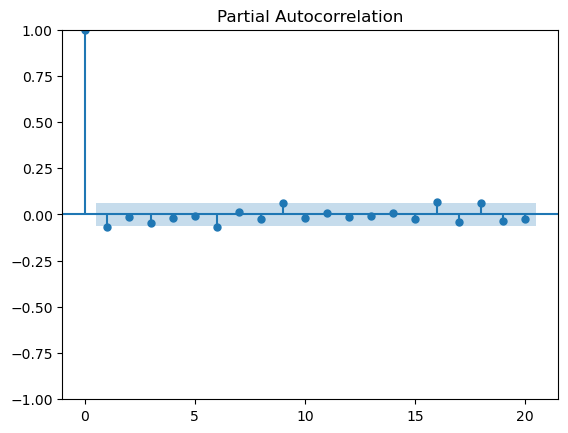

In [31]:
# plot_acf() inbuilt function of class plot_acf ...

plot_pacf(differnce.dropna(),lags=20)
plt.show()

In [32]:
# TO see PACF curver order of AR means p=0 ...

# Use ARIMA Model ARIMA(p,d,q) AR(p)I(1)MA(q) ...

# Here in this time series data arima(0,1,0)

In [33]:
# Forecast with help of ARIMA inbuilt class 
# from statsmodels.tsa.arima_model import ARIMA

# SARIMAX means seasonality ARIMAX : It is special version of ARIMA ...
# Call SARIMAX inbuilt class ...
import statsmodels.api as sm


In [34]:
# Create object of SARIMAX class and passing the following parameter ...
import warnings
warnings.filterwarnings('ignore')
model = sm.tsa.statespace.SARIMAX(df1['Close'],order=(1,1,1),seasonal_order=(1,1,1,12),trend='c')


# trend can be either linear or exponential (non linear means cyclic curve) ...
# if trend is linear than pass 't' in trend parameter ...
# but if trend_exponential than class'c' in trend parameter ...
# seasonal order = (p,d,d,season) but this dataset is not seasonality ...
# season means within year ...
# if seasonality occurs than pass =12 (12 means 1 years = 12 months)

In [35]:
# Train the model with inbuilt method fit() of sarimax class ...
model = model.fit()

In [36]:
model

In [52]:
# Test the model use inbuilt function predict ...

Y_pred = model.predict(start=714,end=1018)

In [53]:
Y_pred

Date
2021-11-24    146.054324
2021-11-26    146.120625
2021-11-29    142.603051
2021-11-30    145.356643
2021-12-01    142.268949
                 ...    
2023-02-06    104.476603
2023-02-07    102.575631
2023-02-08    107.185489
2023-02-09     99.265006
2023-02-10     95.293601
Name: predicted_mean, Length: 305, dtype: float64

In [54]:
# Add new column for y_pred output is existing dataframe df1
df1['Forecast_Predicted'] = Y_pred


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1019 entries, 2019-01-28 to 2023-02-10
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Close               1019 non-null   float64
 1   Forecast_Predicted  305 non-null    float64
dtypes: float64(2)
memory usage: 23.9 KB


In [56]:
df1[713:]

,Close,Forecast_Predicted
Date,,
2021-11-23,145.781998,NaN
2021-11-24,146.119995,146.054324
2021-11-26,142.182999,146.120625
2021-11-29,145.530502,142.603051
2021-11-30,141.897507,145.356643
...,...,...
2023-02-06,102.900002,104.476603
2023-02-07,107.639999,102.575631
2023-02-08,99.370003,107.185489


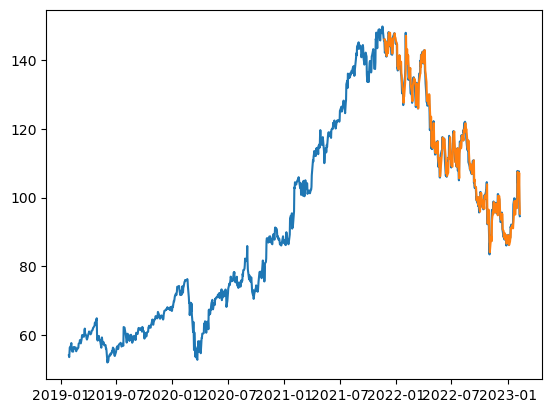

In [57]:
# Visualize actual output and predicted output ...

plt.plot(df1[['Close','Forecast_Predicted']])

# Actual output df1['CLose'] amd predicted output df1['Forecast_Predicted']
plt.show()

In [58]:
# Find the mean square error = sum (Actual Output - Predicted Output) **2) / N 

# Actual Output df1['Score']

In [59]:
Y_test = df1['Close']
# Y_test.shape 
Y_test = Y_test[714:]
Y_test

Date
2021-11-24    146.119995
2021-11-26    142.182999
2021-11-29    145.530502
2021-11-30    141.897507
2021-12-01    141.051498
                 ...    
2023-02-06    102.900002
2023-02-07    107.639999
2023-02-08     99.370003
2023-02-09     95.010002
2023-02-10     94.570000
Name: Close, Length: 305, dtype: float64

In [67]:
# find the mean sqaured error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
print("Mean Square Error : ",mse)


Mean Square Error :  74.92643242437133


In [64]:
# Find the r2 Score ...
from sklearn.metrics import r2_score
mse = r2_score(Y_test,Y_pred)
print("R2_Score : ",mse)

R2_Score :  0.9771314639885189


In [ ]:
# Good Score --> 97 %